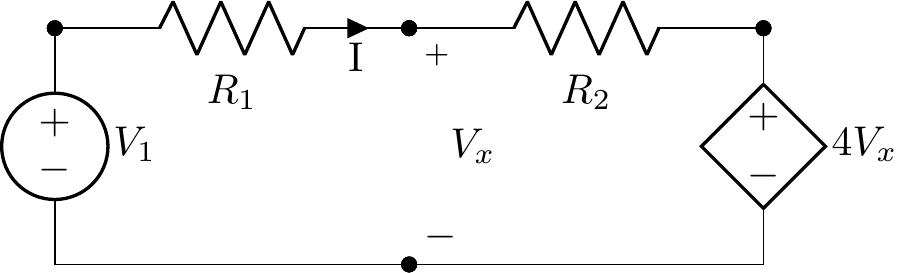

In [1]:
from lcapy import Circuit
cct = Circuit("""
V1 1 0_1 dc; down
R1 1 x; right, size=1.5, i=I
R2 x 2; right, size=1.5
E1 2 0_2 x 0 4; down, l=4 V_x
W 0_1 0; right
W 0 0_2; right
Ox x 0; down, v^=V_x
""")
cct.draw()

Let's determine the current through R1.  There are many ways to solve this; the easiest is to combine the sources, combine the resistances, and then use Ohm's law. 

In [2]:
(cct.V1.V - cct.E1.V) / (cct.R1.Z + cct.R2.Z)

⎧     4⋅R₂⋅V₁      ⎫
⎪    ───────── + V₁⎪
⎨    3⋅R₁ - R₂     ⎬
⎪dc: ──────────────⎪
⎩       R₁ + R₂    ⎭

This can be simplified:

In [3]:
((cct.V1.V - cct.E1.V) / (cct.R1.Z + cct.R2.Z)).simplify()

⎧       3⋅V₁  ⎫
⎨dc: ─────────⎬
⎩    3⋅R₁ - R₂⎭

Not surprisingly due to KCL, this is the same as the current through R2.  Lcapy can solve this directly:

In [4]:
cct.R2.I

⎧       3⋅V₁  ⎫
⎨dc: ─────────⎬
⎩    3⋅R₁ - R₂⎭

Now given the current, we can use Ohm's law to determine the voltage drop across R1.

In [5]:
cct.R1.Z * cct.R1.I

⎧     3⋅R₁⋅V₁ ⎫
⎨dc: ─────────⎬
⎩    3⋅R₁ - R₂⎭

Lcapy can determine this directly.

In [6]:
cct.R1.V

⎧     3⋅R₁⋅V₁ ⎫
⎨dc: ─────────⎬
⎩    3⋅R₁ - R₂⎭

This can be simplified...

In [7]:
cct.R1.V.simplify()

⎧     3⋅R₁⋅V₁ ⎫
⎨dc: ─────────⎬
⎩    3⋅R₁ - R₂⎭

Using KVL, the unknown voltage is thus the voltage generated by the source V1 minus the voltage drop across R1.

In [8]:
cct.V1.V - cct.R1.V

⎧       3⋅R₁⋅V₁      ⎫
⎨dc: - ───────── + V₁⎬
⎩      3⋅R₁ - R₂     ⎭

Of course, Lcapy can determine this directly.  Here Ox is the name of the open circuit over which we wish to determine the voltage difference.

In [9]:
cct.Ox.V

⎧     -R₂⋅V₁  ⎫
⎨dc: ─────────⎬
⎩    3⋅R₁ - R₂⎭

Alternatively, we can query Lcapy for the voltage at node 'x' with respect to ground.  This gives the same result.

In [10]:
cct['x'].V

⎧     -R₂⋅V₁  ⎫
⎨dc: ─────────⎬
⎩    3⋅R₁ - R₂⎭

This can be displayed in the time domain using:

In [11]:
cct['x'].v

 -R₂⋅V₁  
─────────
3⋅R₁ - R₂

Or alternatively using:

In [12]:
from lcapy import t
cct['x'].V(t)

 -R₂⋅V₁  
─────────
3⋅R₁ - R₂